In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, f1_score
from sklearn import preprocessing
import seaborn as sns
from matplotlib import pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

# Préparation des données

In [2]:
# Load the Parkinson's dataset
parkinson_data = pd.read_csv("audio_features_A.csv")

# Extract the features and labels
X = parkinson_data.drop(['name','status'], axis=1) # MFCC feature vectors
y = parkinson_data['status'] # labels (0 = healthy, 1 = Parkinson's)

In [3]:
parkinson_data

,name,status,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13
0,HC_f_a_c,0,-237.286790,139.80032,-84.910150,-164.609800,10.363490,-30.613455,-10.627548,8.624021,-39.487076,-51.682590,-114.157190,-61.415684,-78.853096
1,HC_f_a_c1,0,-229.847210,170.23766,-69.513360,-71.711876,70.451324,79.968990,-32.700950,-43.471924,6.615326,-10.410770,-44.611256,0.288241,-43.802124
2,HC_f_a_f,0,-364.504880,210.13740,-52.943910,-51.138750,56.999660,-18.388283,-59.295757,-102.010155,-110.914980,1.418754,-28.179160,45.492172,-13.232738
3,HC_f_a_g,0,-410.250520,245.09216,-34.262768,-77.332220,41.493572,-27.803658,-144.323090,163.088760,-11.995799,2.871592,-60.357723,-16.053354,-10.531968
4,HC_f_a_g1,0,-393.885650,202.22246,-60.169080,-77.499260,51.307160,-52.065420,44.469800,46.017593,-112.335510,27.981163,-4.511343,16.818808,-69.880585
5,HC_f_a_m,0,-395.420560,268.31284,-43.031740,-62.364360,75.567894,-94.814230,46.428930,34.786423,-146.268770,-51.021057,-50.665150,86.147160,11.703414
6,HC_f_a_p,0,-264.719020,104.29951,-188.122270,-61.006435,99.551370,-25.126837,-4.600727,-70.554985,-83.367290,-49.962982,-0.922279,-6.341867,12.625546
7,HC_f_a_p1,0,-406.675930,243.15906,-27.017950,-55.482555,-22.094345,-85.753390,-75.989570,118.838010,26.638168,-35.176083,-45.414760,-37.706104,-27.192606
8,HC_h_a_a,0,-303.140170,237.92065,30.431650,-95.027460,-59.030700,-90.006040,-138.642820,42.250637,88.829080,-27.320395,-2.771495,-29.399012,-1.213995
9,HC_h_a_a1,0,-256.858860,251.50073,1.310177,-131.864730,-79.564735,18.615051,-95.585350,-36.041573,65.319890,42.932520,-60.804455,-66.427925,-18.584518


In [4]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [5]:
cv = KFold (n_splits=5, shuffle=True, random_state=42) 

# KNN

In [6]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance'], 'p': [1, 2]} 

grid_search = GridSearchCV(knn, param_grid, cv=cv)
grid_search.fit(X_train, y_train)      

print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.86      0.92      0.89        13

    accuracy                           0.87        23
   macro avg       0.87      0.86      0.87        23
weighted avg       0.87      0.87      0.87        23

Accuracy: 0.8695652173913043
F1-score: 0.888888888888889


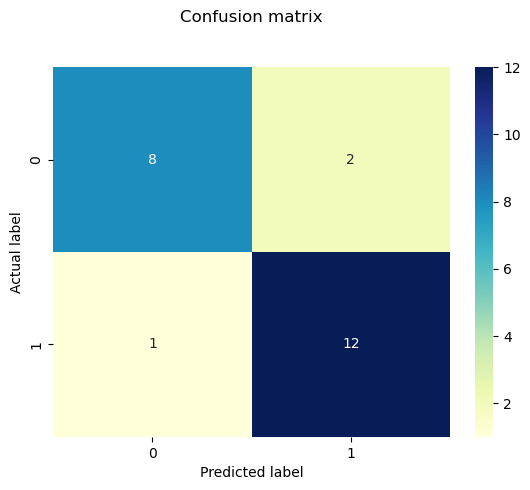

In [7]:
# Cross-validation pour estimer KNN-accuracy 
knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'],
                           weights=grid_search.best_params_['weights'],
                           p=grid_search.best_params_['p'])

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# accuracy et f1_score
KNN_accuracy = accuracy_score(y_test, y_pred)
KNN_f1_score = f1_score(y_test, y_pred)

# matrice de confusion
cm = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Classification report.
print(classification_report(y_test, y_pred))

print("Accuracy:", KNN_accuracy)
print("F1-score:", KNN_f1_score)

# SVM

In [8]:
SVM = SVC()
param_grid = {"C": [0.001, 0.0001, 0.1, 1.], "kernel": ["linear", "poly", "sigmoid"], "gamma": ["scale", "auto"]}

grid_search = GridSearchCV(SVM, param_grid, cv=cv)
grid_search.fit(X_train, y_train)      

print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'C': 0.001, 'gamma': 'scale', 'kernel': 'linear'}


              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.85      0.92        13

    accuracy                           0.91        23
   macro avg       0.92      0.92      0.91        23
weighted avg       0.93      0.91      0.91        23

Accuracy: 0.9130434782608695
F1-score: 0.9166666666666666


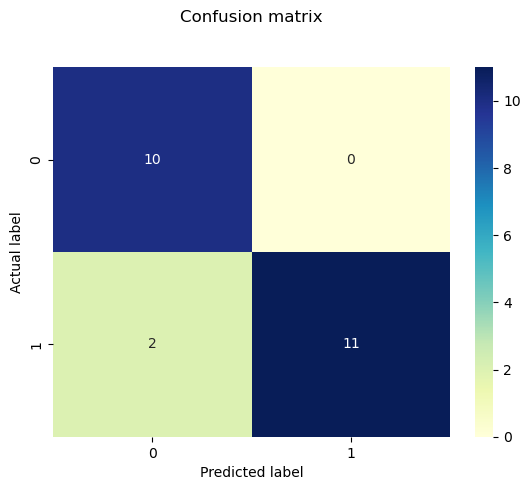

In [9]:
# Cross-validation pour estimer SVM-accuracy 
SVM = SVC(C=grid_search.best_params_['C'],
                           kernel=grid_search.best_params_['kernel'],
                           gamma=grid_search.best_params_['gamma'])

SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)

# accuracy et f1_score
SVM_accuracy = accuracy_score(y_test, y_pred)
SVM_f1_score = f1_score(y_test, y_pred)

# matrice de confusion
cm = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Classification report.
print(classification_report(y_test, y_pred))

print("Accuracy:", SVM_accuracy)
print("F1-score:", SVM_f1_score)

# DT

In [10]:
DT = DecisionTreeClassifier()
param_grid = { 'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['auto', 'sqrt', 'log2']}

grid_search = GridSearchCV(DT, param_grid, cv=cv)
grid_search.fit(X_train, y_train)      

print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5}


              precision    recall  f1-score   support

           0       0.33      0.20      0.25        10
           1       0.53      0.69      0.60        13

    accuracy                           0.48        23
   macro avg       0.43      0.45      0.42        23
weighted avg       0.44      0.48      0.45        23

Accuracy: 0.4782608695652174
F1-score: 0.5999999999999999


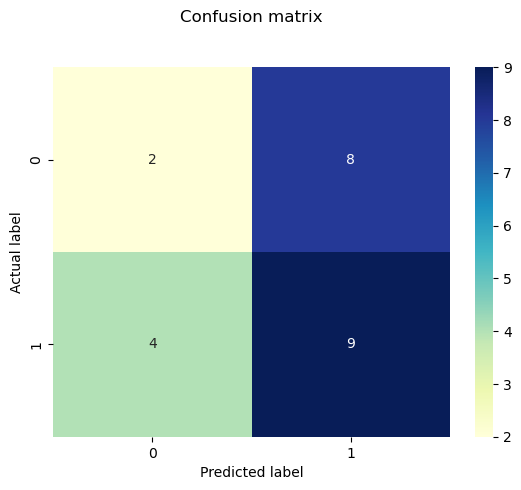

In [11]:
DT = DecisionTreeClassifier(max_depth=grid_search.best_params_['max_depth'],
                           min_samples_split=grid_search.best_params_['min_samples_split'],
                           min_samples_leaf=grid_search.best_params_['min_samples_leaf'], 
                           max_features= grid_search.best_params_['max_features'])                                  

DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)

# accuracy et f1_score
DT_accuracy = accuracy_score(y_test, y_pred)
DT_f1_score = f1_score(y_test, y_pred)

# matrice de confusion
cm = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Classification report.
print(classification_report(y_test, y_pred))

print("Accuracy:", DT_accuracy)
print("F1-score:", DT_f1_score)

# RF

In [12]:
RF = RandomForestClassifier()
param_grid = {'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']}

grid_search = GridSearchCV(RF, param_grid, cv=cv)
grid_search.fit(X_train, y_train)      

print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}


              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.80      0.92      0.86        13

    accuracy                           0.83        23
   macro avg       0.84      0.81      0.82        23
weighted avg       0.83      0.83      0.82        23

Accuracy: 0.8260869565217391
F1-score: 0.8571428571428571


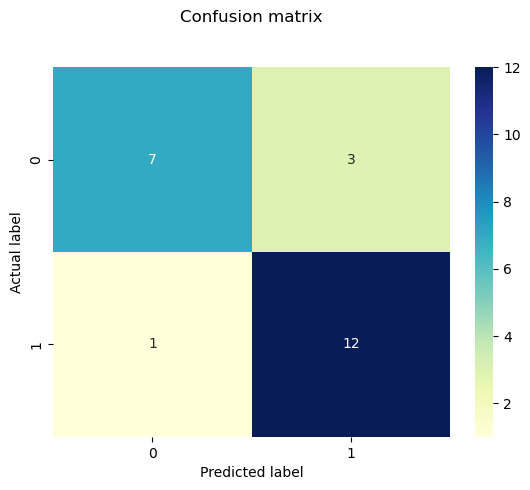

In [13]:
RF = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'],
                           max_depth=grid_search.best_params_['max_depth'],
                           min_samples_split=grid_search.best_params_['min_samples_split'], 
                           min_samples_leaf= grid_search.best_params_['min_samples_leaf'], 
                           max_features= grid_search.best_params_['max_features'])

RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

# accuracy et f1_score
RF_accuracy = accuracy_score(y_test, y_pred)
RF_f1_score = f1_score(y_test, y_pred)

# matrice de confusion
cm = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Classification report.
print(classification_report(y_test, y_pred))

print("Accuracy:", RF_accuracy)
print("F1-score:", RF_f1_score)

# LR

In [14]:
LR = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

grid_search = GridSearchCV(LR, param_grid, cv=cv)
grid_search.fit(X_train, y_train)      

print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}


              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.85      0.92        13

    accuracy                           0.91        23
   macro avg       0.92      0.92      0.91        23
weighted avg       0.93      0.91      0.91        23

Accuracy: 0.9130434782608695
F1-score: 0.9166666666666666


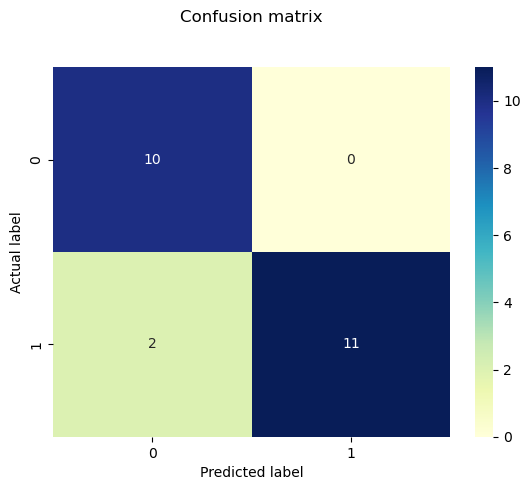

In [15]:
LR = LogisticRegression(C=grid_search.best_params_['C'],
                           penalty=grid_search.best_params_['penalty'],
                           solver=grid_search.best_params_['solver'])

LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

# accuracy et f1_score
LR_accuracy = accuracy_score(y_test, y_pred)
LR_f1_score = f1_score(y_test, y_pred)

# matrice de confusion
cm = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Classification report.
print(classification_report(y_test, y_pred))

print("Accuracy:", LR_accuracy)
print("F1-score:", LR_f1_score)

In [21]:
print("Comparaison des performances:")
print("             Accuracy             ||     F1 score ")
print("KNN    "   , KNN_accuracy, "                ", KNN_f1_score)
print("SVM    "   , SVM_accuracy, "                ", SVM_f1_score)
print("DT     "   , DT_accuracy, "                ", DT_f1_score)
print("RF     "   , RF_accuracy, "                ", RF_f1_score)
print("LR     "   , LR_accuracy, "                ", LR_f1_score)

Comparaison des performances:
             Accuracy             ||     F1 score 
KNN     0.8695652173913043                  0.888888888888889
SVM     0.9130434782608695                  0.9166666666666666
DT      0.4782608695652174                  0.5999999999999999
RF      0.8260869565217391                  0.8571428571428571
LR      0.9130434782608695                  0.9166666666666666
